<a href="https://colab.research.google.com/github/Bokyoung-00/python_education/blob/master/Titanic_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic=pd.read_csv("C:/bkk/titanic.csv")

In [ ]:
titanic['Title']=titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Capt          1
Countess      1
Mme           1
Sir           1
Jonkheer      1
Don           1
Lady          1
Name: Title, dtype: int64

In [ ]:
titanic['Title1']=9
for row in range(0,len(titanic)):
    if titanic.iloc[row,12]=='Mr':
        titanic.iloc[row,13]=0
    elif titanic.iloc[row,12]=='Miss':
        titanic.iloc[row,13]=1
    elif titanic.iloc[row,12]=='Mrs':
        titanic.iloc[row,13]=2
    else:
        titanic.iloc[row,13]==3

In [ ]:
title_mapping={"Mr":0,"Miss":1, "Mrs":2,"Master":3,"Dr":3,"Rev":3, "Col":3,"Major":3, "Mlle":3,"Jonkheer":3,
               "Countess":3, "Don":3,"Ms":3,"Capt":3,"Mme":3,"Sir":3,"Lady":3}

titanic['Title2']=titanic['Title'].map(title_mapping)

In [ ]:
titanic.drop("Name",axis=1, inplace=True)

In [ ]:
titanic_01=titanic.copy()

In [ ]:
sex_mapping={"male":0,"female":1}
titanic['Sex']=titanic['Sex'].map(sex_mapping)

In [ ]:
titanic.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    46.5
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [ ]:
titanic["Age"].fillna(titanic.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
Title2           0
dtype: int64

In [ ]:
titanic.loc[titanic['Age']<=16, 'Age1']=0,
titanic.loc[(titanic['Age']>16) &  (titanic['Age']<=26), 'Age1']=1,
titanic.loc[(titanic['Age']>26) &  (titanic['Age']<=36), 'Age1']=2,
titanic.loc[(titanic['Age']>36) &  (titanic['Age']<=62), 'Age1']=3,
titanic.loc[titanic['Age']>62 ,'Age1']=4

In [ ]:
titanic['Age1'].value_counts()

2.0    336
1.0    255
3.0    181
0.0    104
4.0     15
Name: Age1, dtype: int64

In [ ]:
titanic_03=titanic.copy() #나이 완료

In [ ]:
titanic['Embarked1']=titanic['Embarked'].fillna('S')

In [ ]:
#{"S":0,"C":1,"Q":2}

embark_mapping={"S":0,"C":1,"Q":2}
titanic['Embarked2']=titanic['Embarked1'].map(embark_mapping)

In [ ]:
titanic['Embarked1'].value_counts()

S    646
C    168
Q     77
Name: Embarked1, dtype: int64

In [ ]:
titanic['Embarked2'].value_counts()

0    646
1    168
2     77
Name: Embarked2, dtype: int64

### Fare

In [ ]:
titanic['Fare'].fillna(titanic.groupby("Pclass")['Fare'].transform("median"), inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Age1,Embarked1,Embarked2
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1.0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,3.0,C,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1.0,S,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2.0,S,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,2.0,S,0


In [ ]:
titanic.loc[titanic['Fare']<=17, 'Fare1']=0,
titanic.loc[(titanic['Fare']>17) &  (titanic['Fare']<=30), 'Fare1']=1,
titanic.loc[(titanic['Fare']>30) &  (titanic['Fare']<=100), 'Fare1']=2,
titanic.loc[titanic['Fare']>100 ,'Fare1']=3

In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title1,Title2,Age1,Embarked1,Embarked2,Fare1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1.0,S,0,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2,3.0,C,1,2.0


### Cabin

In [ ]:
titanic['Cabin1']=titanic['Cabin'].str[:1]

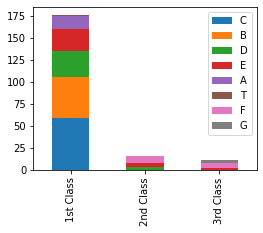

In [ ]:
#데이터 어떻게 생겼는지
Pclass1= titanic[titanic['Pclass']==1]['Cabin1'].value_counts()
Pclass2= titanic[titanic['Pclass']==2]['Cabin1'].value_counts()
Pclass3= titanic[titanic['Pclass']==3]['Cabin1'].value_counts()
df=pd.DataFrame([Pclass1 , Pclass2 , Pclass3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True, figsize=(4,3))

In [ ]:
#매핑(문자열은 결측치 처리 어려우니까)
cabin_mapping={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8,}

titanic['Cabin2']=titanic['Cabin1'].map(cabin_mapping)

In [ ]:
#중앙값으로 대치
titanic['Cabin2'].fillna(titanic.groupby("Pclass")["Cabin2"].transform("median"),inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title1           0
Title2           0
Age1             0
Embarked1        0
Embarked2        0
Fare1            0
Cabin1         687
Cabin2           0
dtype: int64

### FamilySize

In [ ]:
titanic["FamilySize"]=titanic["SibSp"]+titanic["Parch"]+1

(0.0, 11.0)

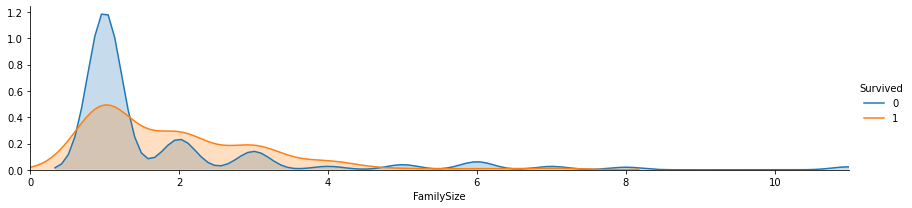

In [ ]:
import seaborn as sns
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "FamilySize",  shade=True)
facet.set(xlim=(0, titanic["FamilySize"].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
titanic['FamilySize1']=titanic['FamilySize'].map(family_mapping)

In [ ]:
titanic.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title1,Title2,Age1,Embarked1,Embarked2,Fare1,Cabin1,Cabin2,FamilySize,FamilySize1
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1.0,S,0,0.0,NaN,2.0,2,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,...,2,2,3.0,C,1,2.0,C,0.8,2,0.4


In [ ]:
sel_column = ["Survived", "Pclass", "Title2", "Sex","Age1", "Embarked2", "Fare1", "Cabin2", "FamilySize1"]
titanic_new = titanic[sel_column]

In [ ]:
titanic_new.head()

,Survived,Pclass,Title2,Sex,Age1,Embarked2,Fare1,Cabin2,FamilySize1
0,0,3,0,0,1.0,0,0.0,2.0,0.4
1,1,1,2,1,3.0,1,2.0,0.8,0.4
2,1,3,1,1,1.0,0,0.0,2.0,0.0
3,1,1,2,1,2.0,0,2.0,0.8,0.4
4,0,3,0,0,2.0,0,0.0,2.0,0.0


In [ ]:
titanic_new.columns=["Survived", "Pclass", "Title", "Sex","Age", "Embarked", "Fare", "Cabin", "FamilySize"]

In [ ]:
titanic_new.to_excel("c:/bkk/titanic_new.xlsx")